In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
L = np.array([[1, 0, 0],
              [0.33, 1, 0],
              [-0.33, 0.82, 1]])
U = np.array([[3, -1, 1],
              [0, 3.3, 2.7],
              [0, 0, -0.9]])
b = np.array([[1],
              [2],
              [1]])
x_til = np.array([[1.6],
                  [1.8],
                  [-2]])

A = np.array([[3, -1, 1],
              [-1, 3, 1],
              [1, 3, 3]])

b_til = A.dot(x_til)

In [3]:
b-b_til

array([[-8.8817842e-16],
       [ 2.0000000e-01],
       [ 0.0000000e+00]])

In [4]:
L.dot(U)

array([[ 3.   , -1.   ,  1.   ],
       [ 0.99 ,  2.97 ,  3.03 ],
       [-0.99 ,  3.036,  0.984]])

In [5]:
0-0.91-(0.82*1.13)

-1.8365999999999998

In [6]:
500*0.066

33.0

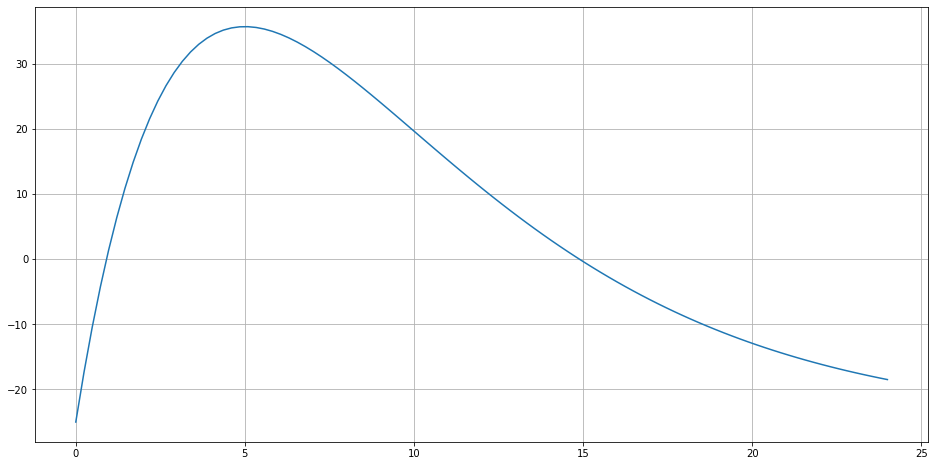

In [7]:
t = np.linspace(0, 24, 100)
y = 500*0.066*t*np.exp(-t/5)-25
y1 = np.exp(-t/5)
plt.figure(1, (16, 8))
plt.plot(t, y)
plt.grid()

In [61]:
x=11
for i in range(50):
    #x = ((2*x*x)-(11*x)+55)/((3*x)-17)
    #x = ((x*x)-(4*x)+72)/((3*x)-14)
    x = (x+108)/(3*x-14)
    print(x)

6.2631578947368425
23.857142857142854
2.290322580645162
-15.470588235294123
-1.531645569620253
-5.72566371681416
-3.2804428044280445
-4.392354124748491
-3.812319538017324
-4.095917363502213
-3.952566285575286
-4.023847376788553
-3.9881090310384777
-4.005953653100479
-3.997025217006606
-4.001487902210488
-3.9992561765951202
-4.00037194362479
-3.9998140361685355
-4.000092983910922
-3.9999535085433418
-4.000023245853029
-3.9999883771046605
-4.0000058114554635
-3.9999970942742165
-4.000001452863379
-3.9999992735684327
-4.000000363215815
-3.9999998183921
-4.000000090803952
-3.9999999545980245
-4.000000022700988
-3.999999988649506
-4.000000005675247
-3.9999999971623765
-4.000000001418812
-3.999999999290594
-4.000000000354703
-3.9999999998226485
-4.000000000088676
-3.999999999955662
-4.000000000022169
-3.9999999999889155
-4.000000000005542
-3.999999999997229
-4.000000000001386
-3.9999999999993068
-4.000000000000347
-3.999999999999827
-4.000000000000086


In [59]:
6.6/5

1.3199999999999998

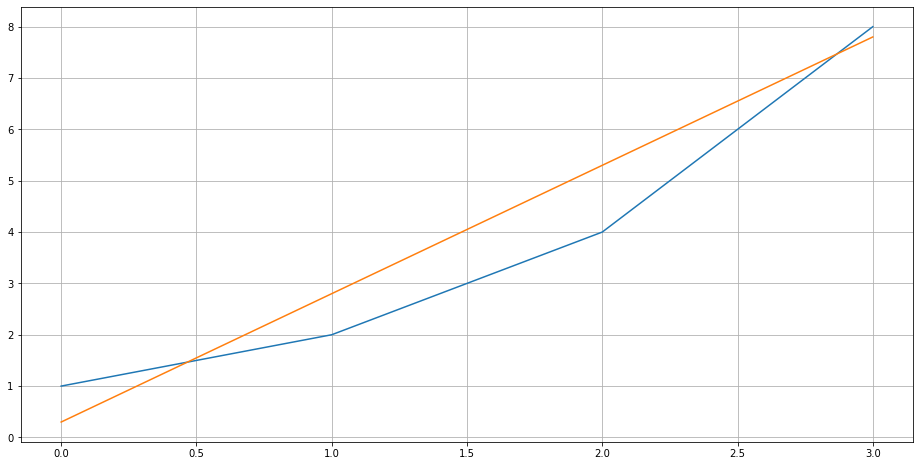

In [16]:
t = np.linspace(0, 3, 4)
y = np.array([1, 2, 4, 8])
y1 = ((50/20)*t)+(6/20)
plt.figure(1, (16, 8))
plt.plot(t, y)
plt.plot(t, y1)
plt.grid()

In [21]:
A = np.array([[-6.8, -4.2, 6.1],
              [2, -5.2, -1.2],
              [-5.7, 1.8, 5.7]])

b = np.array([[-13.3],
             [61.7],
             [-62]])

sig = 3
troca = False
linha = np.zeros((1,len(A)))
linha_tr = np.zeros((1,len(A)))

P = np.zeros((len(A), len(A)))
np.fill_diagonal(P, 1)
#print(P)

#--------------------------------------------------------------------------------------------------
#-----------------------------------Condensação pivotal--------------------------------------------
#--------------------------------------------------------------------------------------------------
for i in range (len(A)):

    atual = A[i][i]

    for j in range (len(A)-i):

        if(A[len(A)-j-1][i] > atual):
            atual = A[len(A)-j-1][i]
            num_linha = len(A)-j-1
            for k in range (len(A)):
                linha[0][k] = A[len(A)-j-1][k]
            troca = True

    if (troca == True):

        for k in range (len(A)):
            linha_tr[0][k] = A[i][k]
        for k in range (len(A)):
            A[num_linha][k] = linha_tr[0][k]
            A[i][k] = linha[0][k]
        P[[i,num_linha]] = P[[num_linha, i]]
    troca = False

print("###############################################################################")
print("################ Condensação pivotal - Mudança de linhas ######################")
print("###############################################################################")
print("Matriz A permutada:\n")
print(A, "\n")
print("Matriz P:\n")
print(P, "\n")
b = P.dot(b)
#--------------------------------------------------------------------------------------------------
#------------------------------Arredondamento pelo significativo-----------------------------------
#--------------------------------------------------------------------------------------------------

def Arredondar (num, sig):
    mult = 0
    arredondado = False
    num_mod = abs(num)
    if (num == 0):
        return 0
    if(num < 1 and num > -1):
        while (arredondado == False):
            num_mod = num_mod*10
            if (int(num_mod) != 0):
                arredondado = True
            else:
                mult+=1
        num = np.round(num, sig+mult)
    else:
        while (arredondado == False):
            
            if (int(num_mod) == 0):
                arredondado = True
            else:
                mult+=1
            num_mod = num_mod/10
        if (sig-mult < 0 ):
            num = np.round(num, 0)
        else:
            num = np.round(num, sig-mult)
    return num

#--------------------------------------------------------------------------------------------------
#-----------------------------------Resolvendo o sistema-------------------------------------------
#--------------------------------------------------------------------------------------------------

LU = np.zeros((len(A), len(A)))
mudou_b = False
for i in range (len(A)-1):

    for j in range (len(A)-i-1):

        fator = Arredondar(A[len(A)-j-1][i]/A[i][i], sig)      

        for k in range (i, len(A)):

            if (mudou_b == False):

                temp_b = -1*(Arredondar(b[i][0]*fator, sig)) + b[len(A)-j-1][0]
                b[len(A)-j-1][0] = Arredondar(temp_b, sig)
                mudou_b = True

            temp = -1*(Arredondar(A[i][k]*fator, sig)) + A[len(A)-j-1][k]
            A[len(A)-j-1][k] = Arredondar(temp, sig)

        A[len(A)-j-1][i] = fator
        mudou_b = False

print("###############################################################################")
print("############################# Sist resolvido ##################################")
print("###############################################################################")
print("Matriz A resolvida:\n")
print(A, "\n")
print("Matriz b:\n")
print(b, "\n")

#--------------------------------------------------------------------------------------------------
#-----------------------------------Calculo de L e U-----------------------------------------------
#--------------------------------------------------------------------------------------------------

L = np.zeros((len(A), len(A)))
np.fill_diagonal(L, 1)

U = np.zeros((len(A), len(A)))

for i in range (len(A)-1):
    for k in range (i + 1, len(A)):
        L[k][i] = A[k][i]

for i in range (len(A)):
    for k in range (1+i):
        U[k][i] = A[k][i]

print("###############################################################################")
print("############################# Matrizes L e U ##################################")
print("###############################################################################")
print("Matriz L:\n")
print(L, "\n")
print("Matriz U:\n")
print(U, "\n")

#--------------------------------------------------------------------------------------------------
#-----------------------------------Calculo dos X's------------------------------------------------
#--------------------------------------------------------------------------------------------------

x = np.zeros((len(A), 1))

for i in range (len(A)-1, -1, -1):

    soma = 0

    for k in range (len(A)):
        if(k != i):
            soma = soma + Arredondar(A[i][k]*x[k][0], sig)
    x[i][0] = Arredondar(((b[i][0]-soma)/A[i][i]), sig)

print("###############################################################################")
print("############################# Solução x #######################################")
print("###############################################################################")
print("X:\n")
print(x, "\n")

###############################################################################
################ Condensação pivotal - Mudança de linhas ######################
###############################################################################
Matriz A permutada:

[[ 2.  -5.2 -1.2]
 [-5.7  1.8  5.7]
 [-6.8 -4.2  6.1]] 

Matriz P:

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] 

###############################################################################
############################# Sist resolvido ##################################
###############################################################################
Matriz A resolvida:

[[  2.    -5.2   -1.2 ]
 [ -2.85 -13.     2.28]
 [ -3.4    1.68  -1.81]] 

Matriz b:

[[ 61.7]
 [114. ]
 [  5. ]] 

###############################################################################
############################# Matrizes L e U ##################################
###############################################################################
Matriz L:

[[ 1